<a href="https://colab.research.google.com/github/AgnesMachau/Moringa-Core-Independent-Project-Week-2/blob/main/Moringa_Core_Independent_Project_Week_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro 
import math
from scipy.stats import mannwhitneyu
from scipy import stats


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#reading the dataset
#previewing the first 5 entries of the dataset
data = pd.read_csv('autolib.csv')
data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#previewing the last five entries of the dataset
data.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#checking the shape of the dataset
data.shape

(16085, 13)

In [ ]:
#checking the description of the dataset
data.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
#checking the columns of the dataset
data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
#checking for unique values in the columns
data.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
#checking for information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
#checking for the data types
data.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
#checking for the description of all the variables of the dataset
data.describe(include='all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/6/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


##**Tidying the dataset**

In [ ]:
#changing the column names to make them uniform.
data.columns = data.columns.str.lower()
data.rename({'postal code': 'postal_code', 'n_daily_data_points': 'daily_points','cell_on_site':'cellonsite'}, axis=1, inplace=True)
data.head()

,postal_code,date,daily_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
data.columns

Index(['postal_code', 'date', 'daily_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:

#Checking for any missing values
#Dropping any missing values
data.isnull().sum()
data.dropna(inplace=True)
data.shape

(16085, 13)

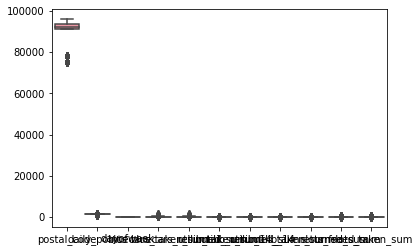

In [ ]:
#Checking for any outliers
sns.boxplot(data=data)

In [ ]:

#Checking for outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


postal_code               2070.0
daily_points                 1.0
dayofweek                    4.0
bluecars_taken_sum         115.0
bluecars_returned_sum      115.0
utilib_taken_sum             4.0
utilib_returned_sum          4.0
utilib_14_taken_sum          9.0
utilib_14_returned_sum       9.0
slots_freed_sum              5.0
slots_taken_sum              5.0
dtype: float64


##**Exploratory Data Analysis**

###**Univariate Analysis**

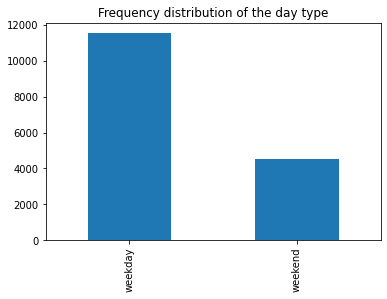

In [ ]:
#A frequency distribution table showing the day type
data['day_type'].value_counts().plot.bar(title='Frequency distribution of the day type')

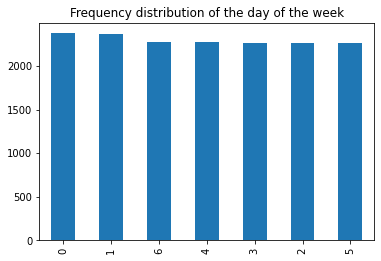

In [ ]:
#A frequency distribution table showing the day of the week
data['dayofweek'].value_counts().plot.bar(title='Frequency distribution of the day of the week')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


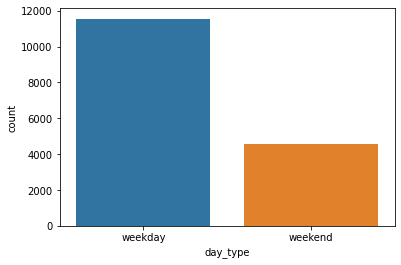

In [ ]:

#A count plot representing the day type column
sns.countplot(data['day_type'])

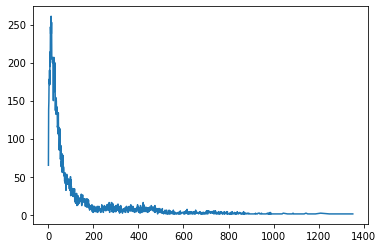

In [ ]:

#A line graph representing the 	bluecars taken sum
data['bluecars_taken_sum'].value_counts().sort_index().plot.line()

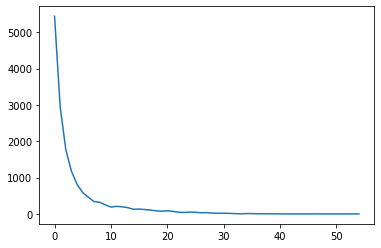

In [ ]:
#A line graph representing the 	utilib taken sum
data['utilib_taken_sum'].value_counts().sort_index().plot.line()

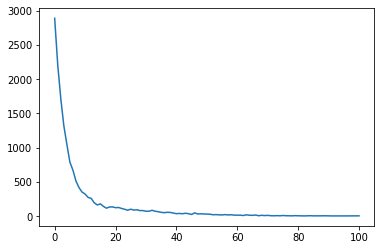

In [ ]:
#A line graph representing the 	utilib 14 taken sum
data['utilib_14_taken_sum'].value_counts().sort_index().plot.line()

([<matplotlib.patches.Wedge at 0x7f99a28d8d10>,
 [Text(-0.694989927461833, 0.852636499762118, 'weekday'),
  Text(0.6949900072914206, -0.8526364346924611, 'weekend')])

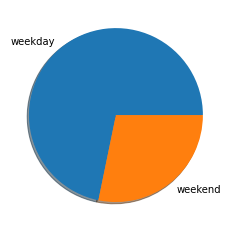

In [ ]:
#A piechart that represents the day type.
plt.pie(data['day_type'].value_counts(),
 labels = ['weekday', 'weekend'], shadow = True)

In [ ]:
#A day type frequency table
pd.crosstab(index=data['day_type'], columns='count') 

col_0,count
day_type,
weekday,11544
weekend,4541


In [ ]:
#A day of the week frequency table
pd.crosstab(index=data['dayofweek'], columns='count') 

col_0,count
dayofweek,
0,2374
1,2363
2,2268
3,2268
4,2271
5,2267
6,2274


In [ ]:
#A frequency table representing the postal code
pd.crosstab(index=data['postal_code'], columns='count') 

col_0,count
postal_code,
75001,156
75002,156
75003,156
75004,156
75005,156
...,...
94700,156
94800,156
95100,156


In [ ]:
#A frequency table representing the date
pd.crosstab(index=data['date'], columns='count') 

col_0,count
date,
1/1/2018,103
1/10/2018,103
1/11/2018,103
1/12/2018,103
1/13/2018,103
...,...
6/5/2018,104
6/6/2018,104
6/7/2018,104


###**Measures of central tendency**

In [ ]:
#Computing the mean
print('Means: ')
print(data['bluecars_taken_sum'].mean())
print(data['utilib_taken_sum'].mean())
print(data['utilib_14_taken_sum'].mean())
print('Mode: ')
print(data['bluecars_taken_sum'].mode())
print(data['utilib_taken_sum'].mode())
print(data['utilib_14_taken_sum'].mode())
print('median: ')
print(data['bluecars_taken_sum'].median())
print(data['utilib_taken_sum'].median())
print(data['utilib_14_taken_sum'].median())

Means: 
125.92695057506994
3.69829033260802
8.600559527510102
Mode: 
0    12
dtype: int64
0    0
dtype: int64
0    0
dtype: int64
median: 
46.0
1.0
3.0


In [ ]:
#Computing the mean
print('Means: ')
print(data['bluecars_returned_sum'].mean())
print(data['utilib_returned_sum'].mean())
print(data['utilib_14_returned_sum'].mean())
print(data['slots_freed_sum'].mean())
print(data['slots_taken_sum'].mean())
print('Mode: ')
print(data['bluecars_returned_sum'].mode())
print(data['utilib_returned_sum'].mode())
print(data['utilib_14_returned_sum'].mode())
print(data['slots_freed_sum'].mode())
print(data['slots_taken_sum'].mode())
print('median: ')
print(data['bluecars_returned_sum'].median())
print(data['utilib_returned_sum'].median())
print(data['utilib_14_returned_sum'].median())
print(data['slots_freed_sum'].median())
print(data['slots_taken_sum'].median())

Means: 
125.912713708424
3.6990985390115014
8.599191793596518
22.62903326080199
22.629281939695367
Mode: 
0    13
dtype: int64
0    0
dtype: int64
0    0
dtype: int64
0    0
dtype: int64
0    0
dtype: int64
median: 
46.0
1.0
3.0
0.0
0.0


In [ ]:
#computing the mode of the day type column
print('Mode: ')
print(data['day_type'].mode())


Mode: 
0    weekday
dtype: object


###**Measures of Dispersion/Variability/Spread**

In [ ]:
#Computing the standard deviation and the variance
print('standard deviation: ')
print(data['bluecars_taken_sum'].std())
print(data['utilib_taken_sum'].std())
print(data['utilib_14_taken_sum'].std())
print(data['slots_taken_sum'].std())
print('variance: ')
print(data['bluecars_taken_sum'].var())
print(data['utilib_taken_sum'].var())
print(data['utilib_14_taken_sum'].var())
print(data['slots_taken_sum'].var())


standard deviation: 
185.42657876727893
5.815057779367249
12.870098297095637
52.146029870452566
variance: 
34383.01611333789
33.81489697737956
165.63943017690403
2719.2084312501315


In [ ]:

#Finding the range of the bluecars_taken_sum
data_max = data["bluecars_taken_sum"].max()
data_min = data["bluecars_taken_sum"].min()
data_max - data_min

1352

In [ ]:
#Finding the range of the utilib_taken_sum
data_max = data["utilib_taken_sum"].max()
data_min = data["utilib_taken_sum"].min()
data_max - data_min

54

In [ ]:
#Finding the range of the utilib_14_taken_sum
data_max = data["utilib_14_taken_sum"].max()
data_min = data["utilib_14_taken_sum"].min()
data_max - data_min

100

In [ ]:
#Finding the range of the slots_taken_sum
data_max = data["slots_taken_sum"].max()
data_min = data["slots_taken_sum"].min()
data_max - data_min

359

In [ ]:
#Finding the range of the slots_freed_sum
data_max =data["slots_freed_sum"].max()
data_min = data["slots_freed_sum"].min()
data_max - data_min

360

In [ ]:
#Finding the quatiles
print('Quatiles')
print(data["bluecars_taken_sum"].quantile([0.25,0.5,0.75]))
print(data["utilib_taken_sum"].quantile([0.25,0.5,0.75]))
print(data["utilib_14_taken_sum"].quantile([0.25,0.5,0.75]))
print(data["utilib_taken_sum"].quantile([0.25,0.5,0.75]))
print(data["slots_taken_sum"].quantile([0.25,0.5,0.75]))
print(data["slots_freed_sum"].quantile([0.25,0.5,0.75]))

Quatiles
0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64
0.25    0.0
0.50    1.0
0.75    4.0
Name: utilib_taken_sum, dtype: float64
0.25     1.0
0.50     3.0
0.75    10.0
Name: utilib_14_taken_sum, dtype: float64
0.25    0.0
0.50    1.0
0.75    4.0
Name: utilib_taken_sum, dtype: float64
0.25    0.0
0.50    0.0
0.75    5.0
Name: slots_taken_sum, dtype: float64
0.25    0.0
0.50    0.0
0.75    5.0
Name: slots_freed_sum, dtype: float64


In [ ]:
#Determining the skewness 
print('Skewness')
print(data["bluecars_taken_sum"].skew())
print(data["utilib_taken_sum"].skew())
print(data["utilib_14_taken_sum"].skew())
print(data["slots_taken_sum"].skew())
print(data["slots_freed_sum"].skew())

Skewness
2.4063548974959086
2.5568719194754777
2.5109244534822923
2.5969043474634987
2.5974057870090994


In [ ]:
#Determining the kurtosis 
print('kurtosis')
print(data["bluecars_taken_sum"].kurt())
print(data["utilib_taken_sum"].kurt())
print(data["utilib_14_taken_sum"].kurt())
print(data["slots_taken_sum"].kurt())
print(data["slots_freed_sum"].kurt())

kurtosis
6.172692305510042
7.702361895243428
7.18681525579947
6.442553073772169
6.454514382612528


In [ ]:
data['bluecars_taken_sum'].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: bluecars_taken_sum, dtype: float64

##**Bivariate Analysis**

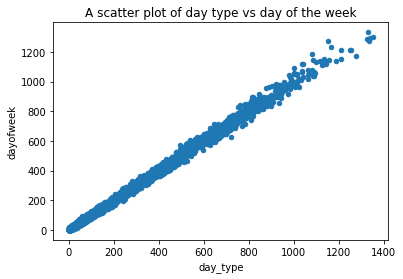

In [ ]:
#Checking the strength of correlation.
#A scatterplot of day type and day of the week.
data.plot(x = 'bluecars_taken_sum', y = 'bluecars_returned_sum', kind = 'scatter')
plt.xlabel('day_type')
plt.ylabel('dayofweek')
plt.title('A scatter plot of day type vs day of the week')
plt.show()

In [ ]:
#The correlation of bluecars taken sum and utilib taken sum
data['bluecars_taken_sum'].corr(data['utilib_taken_sum'])

0.8938325700709975

In [ ]:
#The correlation of bluecars taken sum and utilib 14 taken sum
data['bluecars_taken_sum'].corr(data['utilib_14_taken_sum'])

0.9409460800828591

In [ ]:
#The correlation of utilib taken sum and utilib 14 taken sum
data['utilib_taken_sum'].corr(data['utilib_14_taken_sum'])

0.8475185068976396

In [ ]:
# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind

# Defining our scores...x and y
y = data['bluecars_taken_sum']
x = data['utilib_taken_sum']

# Then calculating the t-test
t_statistic, p_value = ttest_ind(x, y)

# Then displaying the t-statistic
t_statistic

-83.5599447911981

In [ ]:
from scipy import stats
stats.zscore(data['bluecars_taken_sum'])

array([-0.08589624, -0.15061389,  0.06511162, ..., -0.50116785,
       -0.61981688, -0.66835512])

###**Multivariate Analysis**

In [ ]:
#previewing some columns
data.loc[:, "bluecars_taken_sum":"slots_taken_sum"]


,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,110,103,3,2,10,9,22,20
1,98,94,1,1,8,8,23,22
2,138,139,0,0,2,2,27,27
3,104,104,2,2,9,8,25,21
4,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...
16080,15,10,0,0,2,3,0,0
16081,19,19,0,0,2,1,0,0
16082,33,35,1,1,0,0,0,0
16083,11,14,3,5,2,2,0,0


In [ ]:
#A correlation matrix
corrMatrix = data.corr()
corrMatrix

,postal_code,daily_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
daily_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayofweek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
bluecars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
bluecars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


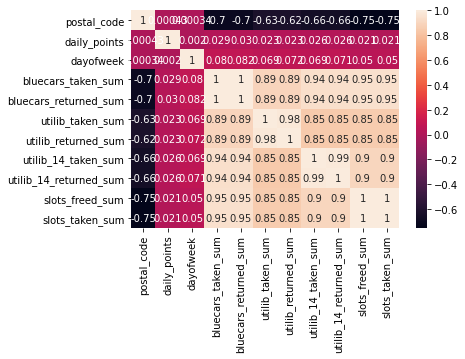

In [ ]:
#finding the correlation of the variables
corelation =data.corr()
sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns, annot=True)

<Figure size 216x216 with 0 Axes>

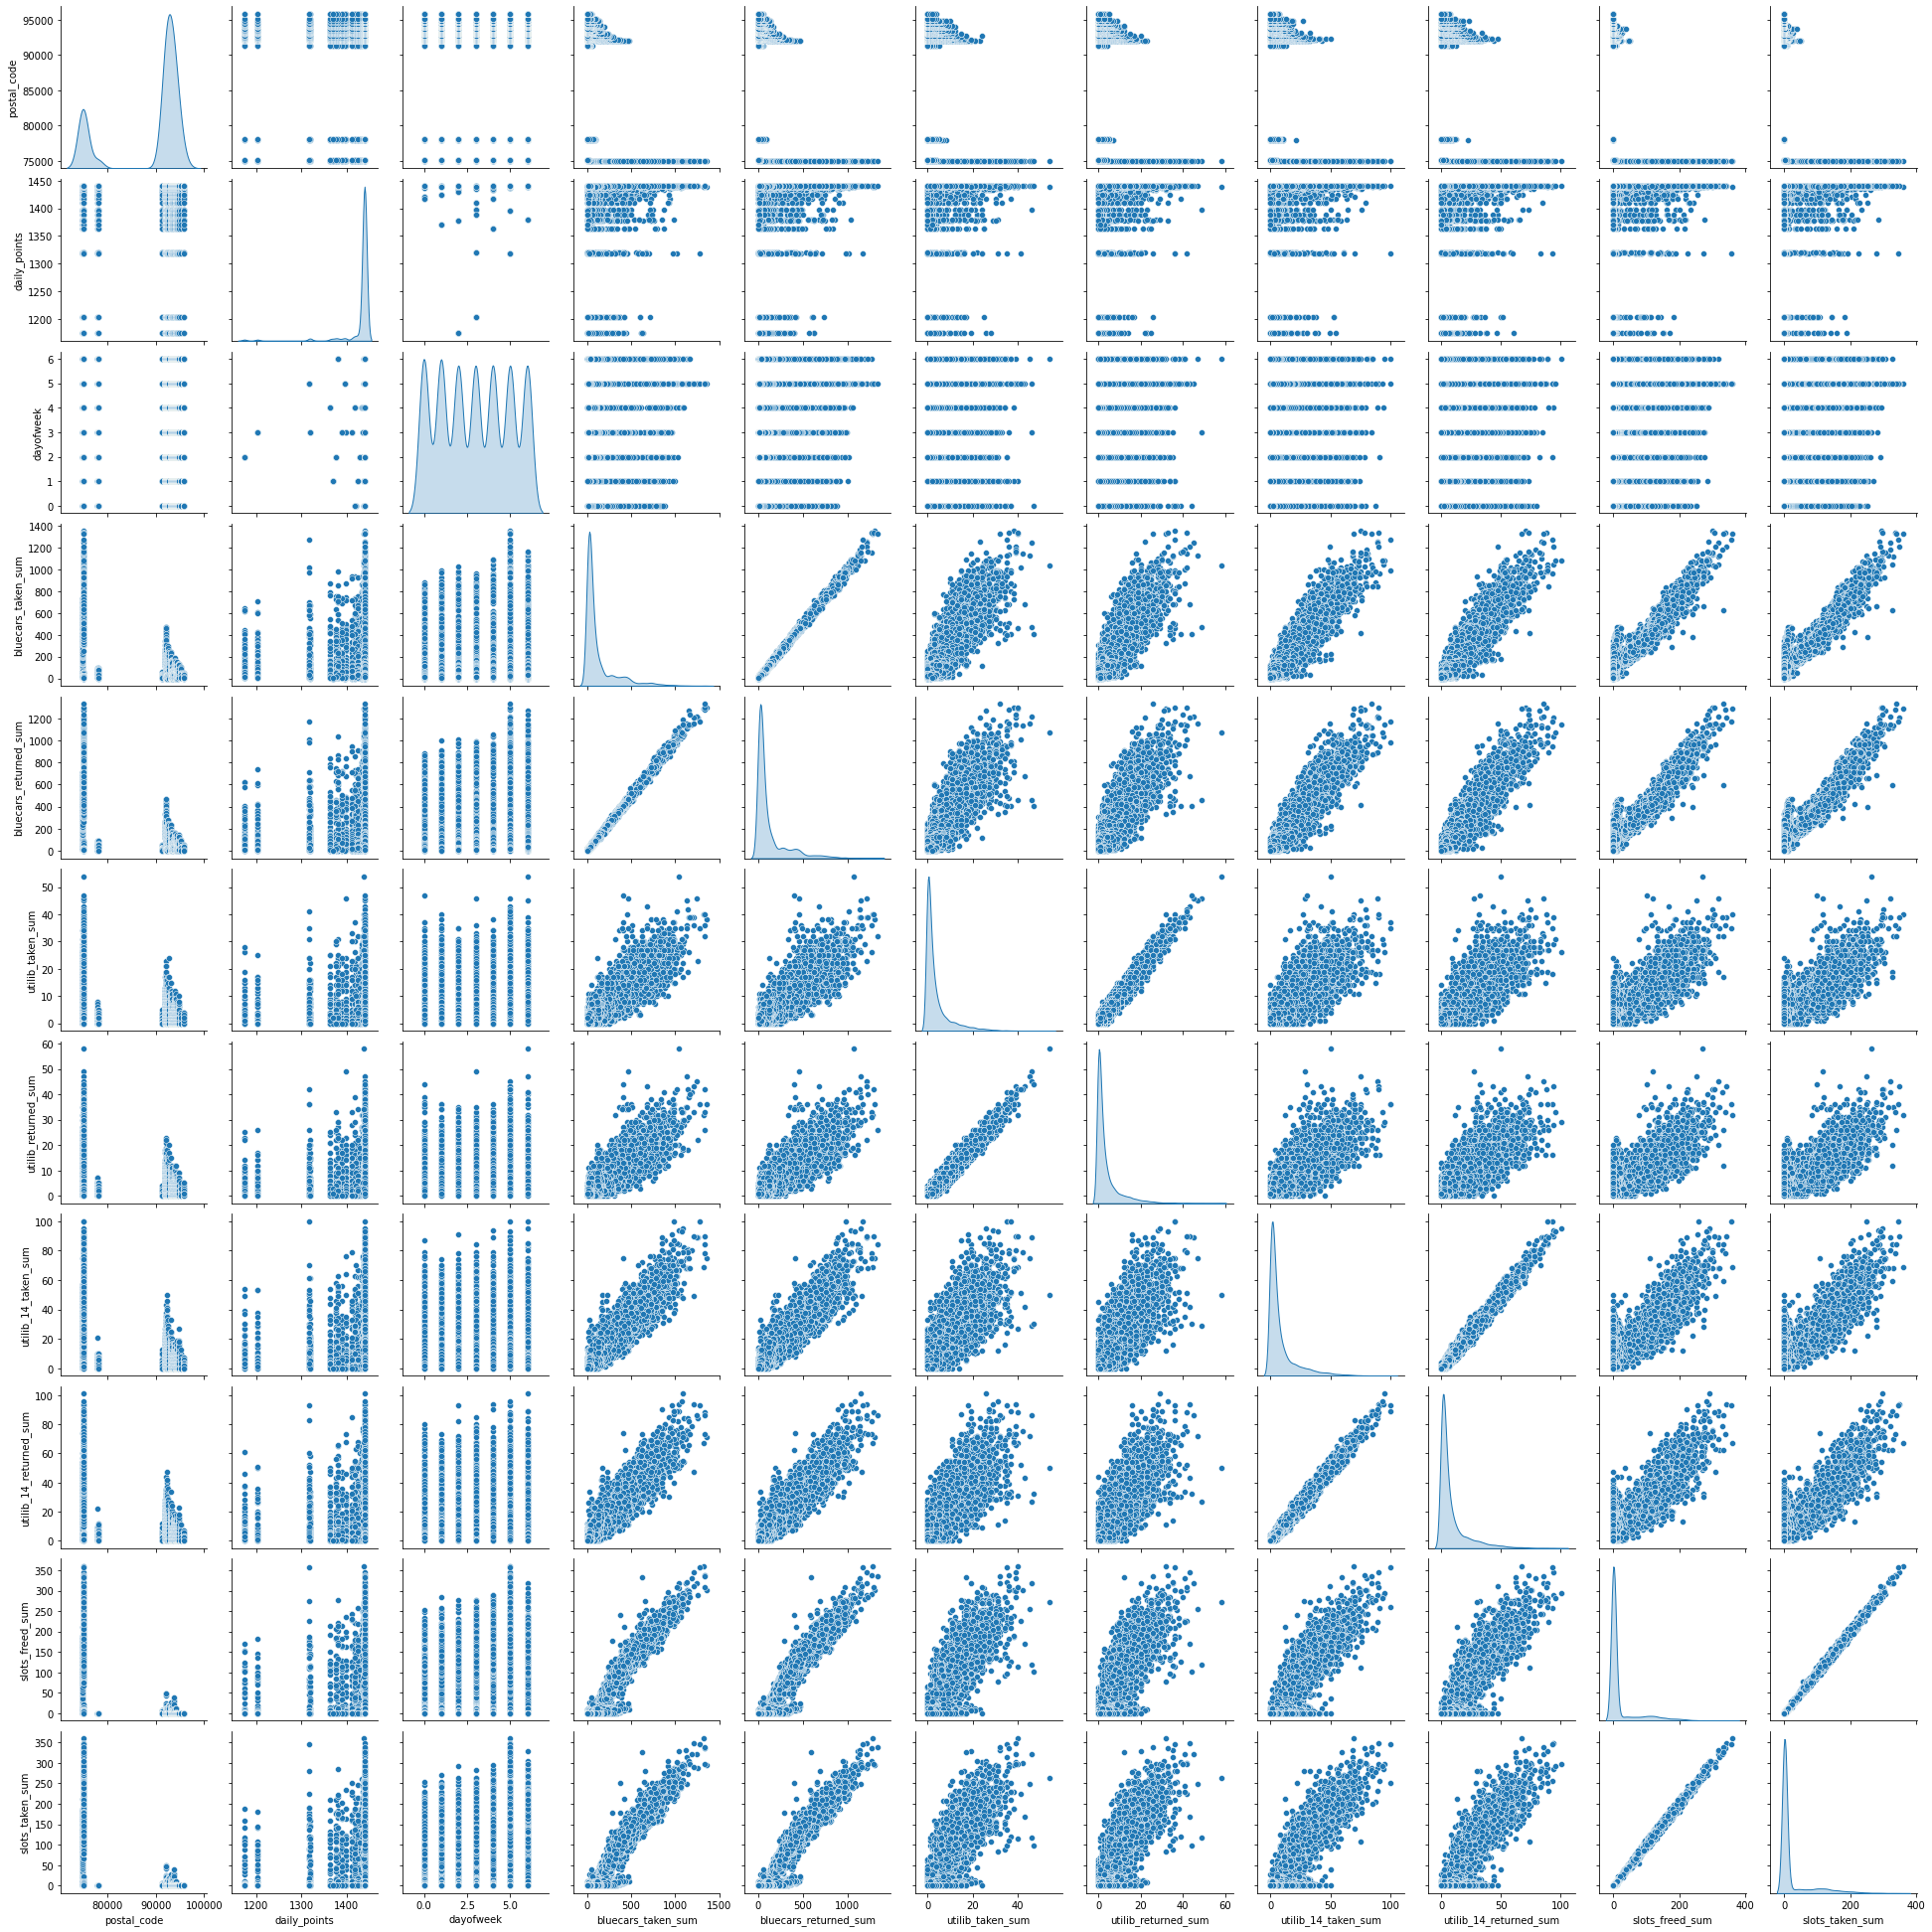

In [ ]:
#A pair plot representing the data
plt.figure(figsize=(3, 3))
sns.pairplot(data, diag_kind='kde');

In [ ]:
data_copy =data.copy()
data_copy.head()

,postal_code,date,daily_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
data_copy["day_type"] = data_copy["day_type"].map({"weekday" : 0 , "weekend" :1})
data_copy.tail()


,postal_code,date,daily_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
16080,95880,6/15/2018,1440,4,0,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,1,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,1,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,0,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,0,2,2,2,1,0,0,0,0


In [ ]:
data_copy1 =data.copy()
data_copy1.head()

,postal_code,date,daily_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:

data_copy1 = data_copy1.drop("date" , axis =1)
data_copy1.head()

,postal_code,daily_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1440,4,weekday,114,117,3,3,6,6,18,20


####**Principal component analysis**

In [ ]:

#Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels.
X = data_copy1.drop('day_type', 1)
y = data_copy1['day_type']

In [ ]:
#Splitting the dataset into the Training set and Test set
#Dividing the data into training and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:

#Normalisation
#We will perform standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

#Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([7.20082546e-01, 9.13194268e-02, 9.06988505e-02, 4.54748586e-02,
       2.83890579e-02, 1.52655613e-02, 6.23204413e-03, 1.62299507e-03,
       7.30273275e-04, 1.44551275e-04, 3.98354243e-05])

In [ ]:
# Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
#Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[2237   76]
 [ 847   57]]
Accuracy 0.7130867267640659


In [ ]:

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[2237   76]
 [ 847   57]]
Accuracy 0.7130867267640659


In [ ]:

# Using 2 Principal Component


#in order to check this, run step 1 to 5 then run the succesive cells for principal component =2

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:

# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[2311    2]
 [  71  833]]
Accuracy 0.9773080509791732


In [ ]:
#using 3 principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[2313    0]
 [  70  834]]
Accuracy 0.9782405968293441


##**Factor analysis**

In [ ]:
%pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(data_copy1)
chi_square_value, p_value

(438153.7231411699, 0.0)

In [ ]:

from factor_analyzer import FactorAnalyzer
fin = FactorAnalyzer()
fin.analyze(data_copy1, 3, rotation=None)
ev, v = fin.get_eigenvalues()
ev

,Original_Eigenvalues
0,7.921863
1,1.003892
2,0.998363
3,0.498298
4,0.311621
5,0.168980
6,0.068928
7,0.018043
8,0.007958
9,0.001613


In [ ]:

fin = FactorAnalyzer()
fin.analyze(data_copy1, 3, rotation="varimax")
fin.loadings

,Factor1,Factor2,Factor3
postal_code,-0.730292,-0.179629,-0.078075
daily_points,0.010721,0.003828,0.035005
dayofweek,0.016974,0.028615,0.107387
bluecars_taken_sum,0.851347,0.267697,0.411936
bluecars_returned_sum,0.850999,0.267828,0.412765
utilib_taken_sum,0.660590,0.601438,0.422368
utilib_returned_sum,0.657243,0.610765,0.422617
utilib_14_taken_sum,0.800813,0.126422,0.567952
utilib_14_returned_sum,0.801365,0.122755,0.570678
slots_freed_sum,0.948003,0.243325,0.191768


In [ ]:
fin.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,5.931172,1.060442,1.438010
Proportion Var,0.539197,0.096404,0.130728
Cumulative Var,0.539197,0.635601,0.766330


##**Linear Discriminant Analysis**

In [ ]:
X = data_copy1.select_dtypes(np.number)
y = data_copy1['day_type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[2308    5]
 [   4  900]]
Accuracy0.9972023624494871


In [ ]:
data_copy2 = data_copy1[data_copy1.day_type == 'weekend']
data_copy2.reset_index(inplace = True)
data_copy2.head()

,index,postal_code,daily_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,5,75001,1437,5,weekend,187,185,6,6,7,8,38,35
1,6,75001,1440,6,weekend,180,180,2,2,10,9,34,34
2,12,75001,1440,5,weekend,224,223,2,2,15,15,38,38
3,13,75001,1440,6,weekend,193,193,2,2,12,12,22,20
4,19,75001,1439,5,weekend,217,217,2,2,25,25,41,39


In [267]:
data_copy2.shape

(4541, 13)

In [269]:
data_copy2['bluecars_taken_sum'].describe()

count    4541.000000
mean      151.090068
std       218.565642
min         0.000000
25%        25.000000
50%        59.000000
75%       156.000000
max      1352.000000
Name: bluecars_taken_sum, dtype: float64

In [ ]:
area_x = data_copy2[data_copy2.postal_code == 75015]
area_x.reset_index(inplace = True)
area_x.head()

,level_0,index,postal_code,daily_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,616,2189,75015,1437,5,weekend,1061,1015,25,25,72,68,253,245
1,617,2190,75015,1440,6,weekend,913,971,27,29,53,56,215,214
2,618,2196,75015,1440,5,weekend,1255,1211,23,22,89,84,289,287
3,619,2197,75015,1440,6,weekend,1097,1135,27,28,82,84,286,286
4,620,2203,75015,1439,5,weekend,1352,1300,38,36,75,71,302,295


In [252]:
area_x['bluecars_taken_sum'].mean()

1072.7727272727273

In [260]:
area_y['bluecars_taken_sum'].mean()

831.0227272727273

In [279]:
area_y = data_copy2[data_copy2.postal_code == 75017]
area_y.reset_index(inplace = True)
area_y.head()

,level_0,index,postal_code,daily_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,704,2501,75017,1437,5,weekend,928,904,18,15,48,47,223,219
1,705,2502,75017,1440,6,weekend,795,846,11,13,38,40,200,206
2,706,2508,75017,1440,5,weekend,992,987,18,20,58,56,245,245
3,707,2509,75017,1440,6,weekend,890,963,17,17,56,64,203,215
4,708,2515,75017,1439,5,weekend,945,939,17,23,42,44,253,255


In [280]:
area_x.shape

(44, 14)

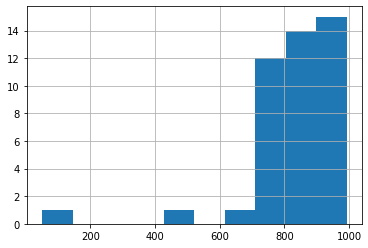

In [ ]:
area_y['bluecars_taken_sum'].hist()

In [281]:
area_y['bluecars_taken_sum'].mean

<bound method Series.mean of 0     928
1     795
2     992
3     890
4     945
5     920
6     929
7     877
8     981
9     846
10    873
11    803
12    862
13    795
14     51
15    872
16    721
17    991
18    785
19    938
20    767
21    985
22    753
23    806
24    713
25    977
26    936
27    932
28    816
29    834
30    762
31    798
32    654
33    868
34    752
35    457
36    973
37    817
38    974
39    857
40    923
41    829
42    859
43    729
Name: bluecars_taken_sum, dtype: int64>

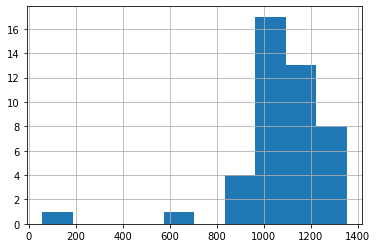

In [ ]:
area_x['bluecars_taken_sum'].hist()

In [ ]:
area_y.shape

(44, 14)

##**Normality Test**

In [ ]:
Q1 = area_x.quantile(0.25)
Q3 = area_x.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
area_x_out = area_x[~((area_x < (Q1 - 1.5 * IQR)) |(area_x > (Q3 + 1.5 * IQR))).any(axis=1)]
area_x_out.shape

level_0                    21.50
index                      75.75
postal_code                 0.00
daily_points                0.00
dayofweek                   1.00
bluecars_taken_sum        167.75
bluecars_returned_sum     133.50
utilib_taken_sum           11.50
utilib_returned_sum        10.00
utilib_14_taken_sum        15.25
utilib_14_returned_sum     19.25
slots_freed_sum            42.50
slots_taken_sum            43.50
dtype: float64


(32, 14)

In [ ]:
Q1 = area_y.quantile(0.25)
Q3 = area_y.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
area_y_out = area_x[~((area_y < (Q1 - 1.5 * IQR)) |(area_y > (Q3 + 1.5 * IQR))).any(axis=1)]
area_y_out.shape

level_0                    21.50
index                      75.75
postal_code                 0.00
daily_points                0.00
dayofweek                   1.00
bluecars_taken_sum        137.25
bluecars_returned_sum     118.00
utilib_taken_sum           12.00
utilib_returned_sum        10.00
utilib_14_taken_sum        17.75
utilib_14_returned_sum     16.75
slots_freed_sum            38.75
slots_taken_sum            31.50
dtype: float64


(33, 14)

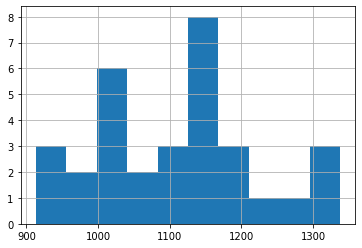

In [ ]:
area_x_out['bluecars_taken_sum'].hist()

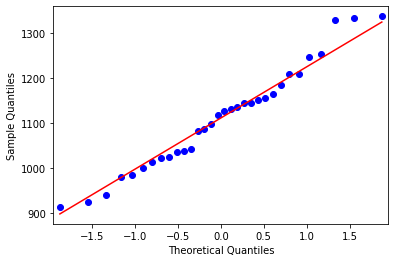

In [ ]:
qqplot(area_x_out["bluecars_taken_sum"], line='s')
plt.show()

In [ ]:
# testing for normality
stat, p = shapiro(area_x_out["bluecars_taken_sum"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.968, p=0.438
Sample looks Gaussian


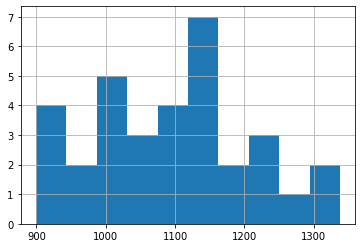

In [ ]:
area_y_out['bluecars_taken_sum'].hist()

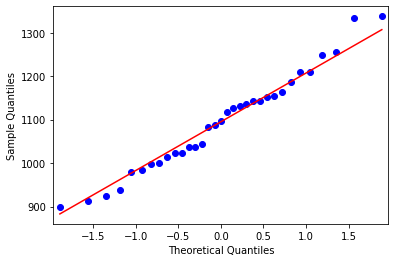

In [ ]:
qqplot(area_y_out["bluecars_taken_sum"], line='s')
plt.show()

In [ ]:
# testing for normality
stat, p = shapiro(area_y_out["bluecars_taken_sum"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.974, p=0.598
Sample looks Gaussian


The data is normally distributed

##**Sampling**

In [248]:
sample1 = area_x_out.sample(n = 10, replace="False")
print(sample1)


    level_0  index  ...  slots_freed_sum  slots_taken_sum
31      647   2298  ...              253              251
10      626   2224  ...              319              330
27      643   2284  ...              302              299
15      631   2242  ...              301              298
12      628   2231  ...              271              273
11      627   2225  ...              305              298
12      628   2231  ...              271              273
27      643   2284  ...              302              299
18      634   2250  ...              271              284
3       619   2197  ...              286              286

[10 rows x 14 columns]


In [265]:
sample1_mean = sample1['bluecars_taken_sum'].mean()
sample1_mean

1098.5

In [275]:
sample1_std = sample1['bluecars_taken_sum'].std()
sample1_std

58.44893307647093

In [249]:
sample2 = area_y_out.sample(n = 10, replace="False")
print(sample2)

    level_0  index  ...  slots_freed_sum  slots_taken_sum
39      655   2323  ...              285              298
2       618   2196  ...              289              287
16      632   2243  ...              278              280
18      634   2250  ...              271              284
12      628   2231  ...              271              273
15      631   2242  ...              301              298
23      639   2270  ...              309              301
41      657   2330  ...              293              298
24      640   2271  ...              236              240
23      639   2270  ...              309              301

[10 rows x 14 columns]


In [264]:
sample2_mean = sample2['bluecars_taken_sum'].mean()
sample2_mean

1081.0

In [277]:
sample2_std = sample2['bluecars_taken_sum'].std()
sample2_std

93.94442801760813

##**Hypothesis Testing**

In [259]:
# Before the t-test can be conducted, the assumptions of the t-test need 
# to be checked to see if the t-test results can be trusted. The data which we will use must 
# meet those assumptions in order for the test results to be valid.
# 1. The samples are independently and randomly drawn
# 2. The distribution of the residuals between the two groups should follow the normal distribution
# 3. The variances between the two groups are equal
# Importing ttest_ind from scipy.stats
import scipy
from scipy.stats import ttest_ind
# Then calculating the t-test for our samples
scipy.stats.ttest_ind(sample1['bluecars_taken_sum'],sample2['bluecars_taken_sum'],
                      equal_var=False)



Ttest_indResult(statistic=0.5001667500463234, pvalue=0.6241870625170738)

In [270]:
data_copy2_mean = data_copy2['bluecars_taken_sum'].mean()
data_copy2_mean

151.09006826690157

In [271]:
data_copy2_std = data_copy2['bluecars_taken_sum'].std()
data_copy2_std

218.5656415891513

In [276]:
#Computing the confidence interval using sample 1
stats.norm.interval(0.95, loc=sample1_mean, scale=sample1_std)

(983.9421962353251, 1213.0578037646749)

In [278]:
#computing the confidence interval using sample 2
stats.norm.interval(0.95, loc=sample2_mean, scale=sample2_std)

(896.8723045372725, 1265.1276954627276)

In [282]:
#finding the mean of sample2's population
area_y['bluecars_taken_sum'].mean

<bound method Series.mean of 0     928
1     795
2     992
3     890
4     945
5     920
6     929
7     877
8     981
9     846
10    873
11    803
12    862
13    795
14     51
15    872
16    721
17    991
18    785
19    938
20    767
21    985
22    753
23    806
24    713
25    977
26    936
27    932
28    816
29    834
30    762
31    798
32    654
33    868
34    752
35    457
36    973
37    817
38    974
39    857
40    923
41    829
42    859
43    729
Name: bluecars_taken_sum, dtype: int64>

In [283]:
#finding the mean of sample1's population
area_x['bluecars_taken_sum'].mean

<bound method Series.mean of 0     1061
1      913
2     1255
3     1097
4     1352
5     1132
6     1248
7     1014
8     1327
9     1043
10    1118
11    1036
12    1144
13    1037
14      58
15    1136
16     999
17    1127
18    1038
19    1209
20     980
21    1186
22     981
23    1024
24     939
25    1277
26    1082
27    1144
28    1002
29    1023
30     925
31     984
32     899
33    1155
34    1016
35     625
36    1335
37    1152
38    1338
39    1164
40    1330
41    1087
42    1209
43    1001
Name: bluecars_taken_sum, dtype: int64>

In [287]:
# Show sample mean
print ( sample1_mean )                         

# calculate how much the estimated mean differs from the main mean
area_x_mean - sample1_mean

1098.5


-171.125

In [288]:
	
TTestIndPower.power(effect_size, nobs1, alpha, ratio=1, df=None, alternative='two-sided')[source]¶

SyntaxError: ignored